started at 15:18

Задание 1
Используем файл keywords.csv.
 
Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце 'region' пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим 'undefined'.
 
Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:
 
geo_data = {
 
    'Центр': ['москва', 'тула', 'ярославль'],
 
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
 
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
 
}
 
Результат классификации запишите в отдельный столбец region.

In [3]:
import pandas as pd
df=pd.read_csv('keywords.csv')
df.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [73]:
#Function with arg arr
#гео-классификатор применялся к разделенному на слова полю "keyword"
def geo_region_arr(arr):
    region='Unknown'
    #strin=strin.lower()
    if  'москва' in arr or 'тула' in arr or 'ярославль' in arr:
        region='Центр'
    if 'петербург' in arr or 'псков' in arr or 'мурманск' in arr:
        region='Северо-Запад'
    if 'владивосток' in arr or 'сахалин' in arr or 'хабаровск' in arr:
        region='Дальний Восток'
    return region

In [80]:
df['region'] = df['keyword'].apply(lambda x: geo_region_arr(x.split(' ')))

In [84]:
df[df['region']!='Unknown'].head()

,keyword,shows,region
127,авито москва,979292,Центр
370,авито ру санкт петербург,425134,Северо-Запад
849,авито ярославль,209581,Центр
1063,фарпост владивосток,176951,Дальний Восток
1236,банк санкт петербург,174375,Северо-Запад


continued at 16:30

Задание 2
Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг
 
Результат классификации запишите в столбец class

In [4]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [105]:
def rating_class(rat):
    if rat<=2.0:
        rat_class='низкий рейтинг'
    if rat>2.0:
        rat_class='средний рейтинг'
    if rat>=4.5:
        rat_class='высокий рейтинг'
    return rat_class

In [110]:
ratings['rat_cl'] = ratings['rating'].apply(lambda x: rating_class(x))
ratings.tail(20)

,userId,movieId,rating,timestamp,rat_cl
99984,671,5010,2.0,1066793004,низкий рейтинг
99985,671,5218,2.0,1065111990,низкий рейтинг
99986,671,5299,3.0,1065112004,средний рейтинг
99987,671,5349,4.0,1065111863,средний рейтинг
99988,671,5377,4.0,1064245557,средний рейтинг
99989,671,5445,4.5,1064891627,высокий рейтинг
99990,671,5464,3.0,1064891549,средний рейтинг
99991,671,5669,4.0,1063502711,средний рейтинг
99992,671,5816,4.0,1065111963,средний рейтинг
99993,671,5902,3.5,1064245507,средний рейтинг


continued at 12:00
paused at 14:00
continued at 6:00

Задание 3
Посчитайте среднее значение Lifetime киноманов (пользователи, которые поставили 100 и более рейтингов). 
Под Lifetime понимается разница между максимальным и минимальным значением timestamp для каждого пользователя. 
Ответ дайте в днях.

In [85]:
from datetime import datetime
from datetime import timedelta


ratings['rat_date'] = ratings['timestamp'].apply(lambda x: datetime.fromtimestamp(x))
ratings[(ratings['userId']==13)].head(21)

,userId,movieId,rating,timestamp,rat_date
889,13,1,5.0,1331380058,2012-03-10 15:47:38
890,13,47,2.5,1331380914,2012-03-10 16:01:54
891,13,110,4.0,1331380038,2012-03-10 15:47:18
892,13,277,4.0,1331379348,2012-03-10 15:35:48
893,13,296,3.5,1331380895,2012-03-10 16:01:35
894,13,318,4.5,1331380029,2012-03-10 15:47:09
895,13,356,5.0,1331380018,2012-03-10 15:46:58
896,13,362,4.5,1331379479,2012-03-10 15:37:59
897,13,480,3.0,1331380025,2012-03-10 15:47:05
898,13,524,3.5,1331379485,2012-03-10 15:38:05


In [84]:
import numpy as np
user_mi_ma=ratings.groupby('userId')['rat_date'].agg([('Lifetime', lambda x: (np.amax(x)-np.amin(x)  ).days  )])
user_mi_ma.head(15)

,Lifetime
userId,
1,0
2,0
3,0
4,2
5,0
6,13
7,0
8,0
9,5


continued at 7:04
paused at 7:05
continued at 20:00
finished at 00:00

Задание 4
Есть мнение, что "раньше снимали настоящее кино, не то что сейчас". 
Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из материалов занятия. 
Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.
 
При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:
 
1. В переменную years запишите список из всех годов с 1950 по 2010.
 
2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
- для каждой строки пройдите по всем годам списка years
- если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
- если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
 
3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец 'year'
 
4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца 'year' и отсортируйте результат по убыванию рейтинга

In [205]:
import numpy as np
years=np.arange(1950, 2011)
print(years)

[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010]


In [206]:
def production_year(name):
    for i in years:
        if str(i) in name:
            year_=i
            break
        else:
            year_=1900
    return year_

In [207]:
movies = pd.read_csv('ml-latest-small/movies.csv')
movies['year'] = movies['title'].apply(lambda x: production_year(x))
ratings_with_titles=pd.merge(ratings, movies, on='movieId', how='inner')

In [239]:

#ratings_by_year=ratings_with_titles.groupby('year').agg( {'rating': ['mean','count']}).reset_index()
#ratings_by_year.reset_index()
ratings_by_year=ratings_with_titles.groupby('year').agg({'rating': np.mean}).reset_index()
#ratings_by_year=ratings_with_titles.groupby('year').agg({"avg_rating": {'rating': np.mean}})
ratings_by_year.head()

,year,rating
0,1900,3.602960
1,1950,3.915254
2,1951,3.983539
3,1952,4.000000
4,1953,3.754587


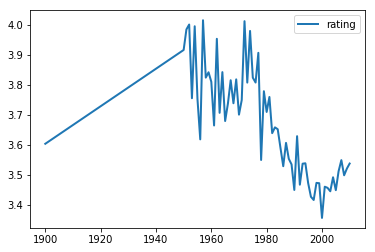

In [240]:
import matplotlib.pyplot as plt
plt.plot(ratings_by_year['year'], ratings_by_year['rating'], linewidth=2)
plt.legend()

In [243]:
ratings_by_year.sort_values(by= 'rating', ascending=False)

,year,rating
8,1957,4.014241
23,1972,4.011136
3,1952,4.000000
5,1954,3.994220
2,1951,3.983539
25,1974,3.978704
13,1962,3.952446
1,1950,3.915254
28,1977,3.905786
15,1964,3.841492


In [ ]:
# похоже, что утверждение верно. Можно еще проверить гипотезы: 
# 1)современная публика избалована большим количеством контента и ставит низкие оценки"
# 2)среди современных фильмов много "категории Б"
# 3)среди старых фильмов в базе в основном шедевры, плохие не заносились или по ним нет оценок